In [91]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import model_selection as sk
import os, re, h5py, shutil
from urllib.request import urlretrieve
from urllib.error import HTTPError
import sklearn

In [92]:
df_inc = pd.read_csv('../../Jaffedbase_labels_FearIncluded.csv', sep=' ')
df_exc = pd.read_csv('../../Jaffedbase_labels_FearExcluded.csv', sep=' ')
df_inc['jpeg_names'] = df_inc.PIC.values
lst = df_inc.jpeg_names
lst[:] += '.jpeg'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [93]:
df_inc

,#,HAP,SAD,SUR,ANG,DIS,FEA,PIC,jpeg_names
0,1,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,KM-NE1.jpeg
1,2,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,KM-NE2.jpeg
2,3,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,KM-NE3.jpeg
3,4,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,KM-HA1.jpeg
4,5,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,KM-HA2.jpeg
5,6,4.61,1.32,1.39,1.23,1.10,1.19,KM-HA3,KM-HA3.jpeg
6,7,5.00,1.13,1.26,1.10,1.10,1.06,KM-HA4,KM-HA4.jpeg
7,8,4.65,1.29,1.39,1.23,1.16,1.16,KM-HA5,KM-HA5.jpeg
8,9,1.42,4.00,1.55,2.39,3.26,3.03,KM-SA1,KM-SA1.jpeg
9,10,1.23,4.39,1.45,2.61,3.19,2.71,KM-SA2,KM-SA2.jpeg


In [94]:
folder = sklearn.model_selection.KFold(n_splits=3, shuffle=True, random_state=42)

In [130]:
def setup_folds():
    os.mkdir('train')
    os.mkdir('train/pos')
    os.mkdir('train/neg')
    os.mkdir('valid')
    os.mkdir('valid/pos')
    os.mkdir('valid/neg')
    
folds = []
for fold_idx, split in enumerate(folder.split(X=df_inc.index.values)):
    folds.append(split)

def run_k_fold(k):
    fold = folds[k]
    train_df = df_inc.loc[fold[0]]
    train_pos = train_df.loc[train_df.HAP.map(lambda x : True if x > 2.5 else False)]
    train_neg = train_df.loc[train_df.HAP.map(lambda x : True if x <= 2.5 else False)]
    valid_df = df_inc.loc[fold[1]]
    valid_pos = valid_df.loc[valid_df.HAP.map(lambda x : True if x > 2.5 else False)]
    valid_neg = valid_df.loc[valid_df.HAP.map(lambda x : True if x <= 2.5 else False)]
    for member in train_pos['jpeg_names'].values:
        os.link(member, os.path.join(os.path.abspath('train/pos'), member))
    for member in train_neg['jpeg_names'].values:
        os.link(member, os.path.join(os.path.abspath('train/neg'), member))
    for member in valid_pos['jpeg_names'].values:
        os.link(member, os.path.join(os.path.abspath('valid/pos'), member))
    for member in valid_neg['jpeg_names'].values:
        os.link(member, os.path.join(os.path.abspath('valid/neg'), member))
        
def clean_up_folds():
    def clean_up(folder):
        for the_file in os.listdir(folder):
            file_path = os.path.join(folder, the_file)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path): shutil.rmtree(file_path)
            except Exception as e:
                print(e)
    clean_up('train')
    os.rmdir('train')
    clean_up('valid')
    os.rmdir('valid')

In [96]:
def df_clean_up(df, directory):
    lst = df['jpeg_names']
    for row, name in enumerate(lst):
        if name not in os.listdir(directory):
            print(name)
            df.drop(row, inplace=True)

In [97]:
df_inc.values.shape

(219, 9)

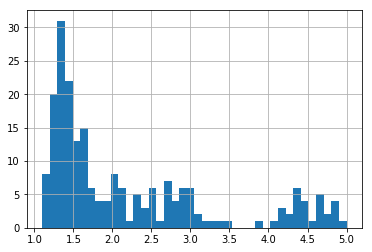

In [123]:
df_inc.HAP.hist(bins=40);

In [126]:
df_inc.HAP.describe()

count    212.000000
mean       2.199387
std        1.089119
min        1.100000
25%        1.390000
50%        1.680000
75%        2.732500
max        5.000000
Name: HAP, dtype: float64

In [98]:
df_clean_up(df_inc, '.')

KM-HA5.jpeg
KM-SA4.jpeg
KM-DI2.jpeg
YN-HA2.jpeg
KR-HA3.jpeg
NM-DI2.jpeg
TM-HA4.jpeg


In [99]:
clean_up_folds()
setup_folds()
run_k_fold(0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [100]:
df_inc.values.shape

(212, 9)

In [101]:
train_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, preprocessing_function=tf.keras.applications.xception.preprocess_input)
train_iter = train_feed.flow_from_directory(
    './train/', target_size=(299, 299), follow_links=True, class_mode='binary')
valid_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0, width_shift_range=0,
    height_shift_range=0, preprocessing_function=tf.keras.applications.xception.preprocess_input)
valid_iter = valid_feed.flow_from_directory(
    './valid/', target_size=(299, 299), follow_links=True, class_mode='binary')

Found 141 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [ ]:
# def convert_all_to_jpeg(directory):
#     base = directory
#     for file in os.listdir(directory):
#         if file[-3:]=='jpg':
#             os.rename(os.path.join(directory, file), os.path.join(directory, file[0:2]+"-"+file[3:6]+'.jpeg'))
#             #print(file)
#             #print(file[0:2]+"-"+file[3:6]+'.jpeg')

In [ ]:
# convert_all_to_jpeg(os.path.abspath('./'))

In [102]:
xcpt_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(299, 299, 3), 
                                              classes=1)

Right, so, we have the layers we add to map from the 2D output of xception. 
In TF, you work with graphs. Ok... so there is some confusing syntax here. `x` is a tensor. With TF (or Keras) you apply tensor to a layer with this wierd `()` syntax. It is because of the graph computational structure of TF, but don't worry about it. In short, lines 2-5 take the output of the line before it, and apply it to a new tensor operation.

Now, lines 5-7 have a bunch of the hyper-parameters that the final layer needs. Just know that I believe that these are the best attributes based on reading a variety of NN papers for a BINARY classfier. For a binary classifier, we only have 1 output neuron, not two. 

In [103]:
x = xcpt_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(682, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.3)(x)
predictions = tf.keras.layers.Dense(1, 'sigmoid', bias_initializer='Zeros', 
                          kernel_initializer=tf.keras.initializers.glorot_uniform(),
                          trainable=True, use_bias=True, name='predictions')(x)
CNN = tf.keras.models.Model(inputs=xcpt_model.inputs, outputs=predictions)

In [104]:
for layer in CNN.layers[:len(xcpt_model.layers)]:
    layer.trainable = False

In [105]:
CNN.compile(loss = tf.keras.losses.binary_crossentropy, 
                    optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=["acc", tf.keras.metrics.mean_squared_logarithmic_error])

In [106]:
top_weights_path = '/home/ubuntu/JapaneseFaces/jaffe/jpg/vision_top_model_weights.h5'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(top_weights_path, monitor='acc',
                                       verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10, verbose=1)
]

In [107]:
CNN.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 149, 149, 32)  864         input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, 149, 149, 32)  128         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, 149, 149, 32)  0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [108]:
train_top = CNN.fit_generator(train_iter, validation_data=valid_iter,
                        callbacks=callbacks_list, steps_per_epoch=train_iter.samples//train_iter.batch_size,
                        validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=15)

Epoch 1/15
4/4 [==============================] - 14s - loss: 0.7205 - acc: 0.4297 - mean_squared_logarithmic_error: 0.1457 - val_loss: 0.7096 - val_acc: 0.4222 - val_mean_squared_logarithmic_error: 0.1486
Epoch 2/15
4/4 [==============================] - 6s - loss: 0.6793 - acc: 0.5663 - mean_squared_logarithmic_error: 0.1384 - val_loss: 0.7008 - val_acc: 0.4370 - val_mean_squared_logarithmic_error: 0.1462
Epoch 3/15
4/4 [==============================] - 5s - loss: 0.6917 - acc: 0.5694 - mean_squared_logarithmic_error: 0.1394 - val_loss: 0.6935 - val_acc: 0.5037 - val_mean_squared_logarithmic_error: 0.1439
Epoch 4/15
4/4 [==============================] - 6s - loss: 0.6701 - acc: 0.5986 - mean_squared_logarithmic_error: 0.1288 - val_loss: 0.6846 - val_acc: 0.5778 - val_mean_squared_logarithmic_error: 0.1407
Epoch 5/15
4/4 [==============================] - 5s - loss: 0.6919 - acc: 0.5480 - mean_squared_logarithmic_error: 0.1385 - val_loss: 0.6776 - val_acc: 0.6148 - val_mean_squared_

In [109]:
train_top.history

{'acc': [0.4296875,
  0.5596330302570938,
  0.5321100928367825,
  0.5963302779635158,
  0.5596330277963516,
  0.640625,
  0.6238532131965008,
  0.5412844053102196,
  0.69724770696885,
  0.6697247722826967,
  0.6875,
  0.6513761500699804,
  0.6055045893432898,
  0.6788990847561338,
  0.6513761484294857],
 'loss': [0.7204890102148056,
  0.6789497935443843,
  0.6969213305263344,
  0.6705125635917034,
  0.6868051492839778,
  0.6637762039899826,
  0.676349747618404,
  0.6882040101453799,
  0.6558576991798681,
  0.6515921108219602,
  0.6457951068878174,
  0.6626675090658556,
  0.6601948874806045,
  0.6369795525839569,
  0.64597416853686],
 'mean_squared_logarithmic_error': [0.14570202305912971,
  0.13764842866210764,
  0.13979178872130332,
  0.12885999201087778,
  0.13672690366933105,
  0.12718896381556988,
  0.13685478994605738,
  0.12793506558881987,
  0.12850581533318267,
  0.12154931328985669,
  0.12238223291933537,
  0.12163223435572527,
  0.12188647181615916,
  0.11827921197501891,
  0

Plot this history

In [87]:
# for layer in CNN.layers[:len(xcpt_model.layers)]:
#     layer.trainable = True

In [88]:
# CNN.compile(loss = tf.keras.losses.binary_crossentropy, 
#                     optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
#                     metrics=["acc", tf.keras.metrics.mean_squared_logarithmic_error])

In [89]:
# train_whole = CNN.fit_generator(train_iter, validation_data=valid_iter,
#                         callbacks=callbacks_list, steps_per_epoch=train_iter.samples//train_iter.batch_size,
#                         validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=15)

Epoch 1/15
4/4 [==============================] - 13s - loss: 0.5926 - acc: 0.6953 - mean_squared_logarithmic_error: 0.1021 - val_loss: 0.5898 - val_acc: 0.7481 - val_mean_squared_logarithmic_error: 0.1084
Epoch 2/15
4/4 [==============================] - 9s - loss: 0.5984 - acc: 0.6865 - mean_squared_logarithmic_error: 0.1036 - val_loss: 0.5947 - val_acc: 0.7407 - val_mean_squared_logarithmic_error: 0.1090
Epoch 3/15
3/4 [=====================>........] - ETA: 1s - loss: 0.7191 - acc: 0.5345 - mean_squared_logarithmic_error: 0.1190

ResourceExhaustedError: OOM when allocating tensor with shape[2048,682]
	 [[Node: training_3/SGD/add_154 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_4/kernel/read, training_3/SGD/sub_154)]]

Caused by op 'training_3/SGD/add_154', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-89-ee8bdad87495>", line 3, in <module>
    validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=15)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/_impl/keras/engine/training.py", line 1964, in fit_generator
    self._make_train_function()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/_impl/keras/engine/training.py", line 952, in _make_train_function
    params=self._collected_trainable_weights, loss=self.total_loss)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/_impl/keras/optimizers.py", line 194, in get_updates
    new_p = p + v
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variables.py", line 754, in _run_op
    return getattr(ops.Tensor, operator)(a._AsTensor(), *args)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 894, in binary_op_wrapper
    return func(x, y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 183, in add
    "Add", x=x, y=y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[2048,682]
	 [[Node: training_3/SGD/add_154 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_4/kernel/read, training_3/SGD/sub_154)]]


In [113]:
CNN.compile(loss = tf.keras.losses.binary_crossentropy, 
                     optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.001),
                     metrics=["acc", tf.keras.metrics.mean_squared_logarithmic_error])

In [116]:
train_top = CNN.fit_generator(train_iter, validation_data=valid_iter,
                        callbacks=callbacks_list, steps_per_epoch=train_iter.samples//train_iter.batch_size,
                        validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=35)

Epoch 1/35
4/4 [==============================] - 5s - loss: 0.6204 - acc: 0.6719 - mean_squared_logarithmic_error: 0.1106 - val_loss: 0.6257 - val_acc: 0.7481 - val_mean_squared_logarithmic_error: 0.1190
Epoch 2/35
4/4 [==============================] - 4s - loss: 0.6541 - acc: 0.6735 - mean_squared_logarithmic_error: 0.1198 - val_loss: 0.6248 - val_acc: 0.7481 - val_mean_squared_logarithmic_error: 0.1189
Epoch 3/35
4/4 [==============================] - 5s - loss: 0.6277 - acc: 0.6896 - mean_squared_logarithmic_error: 0.1144 - val_loss: 0.6214 - val_acc: 0.7556 - val_mean_squared_logarithmic_error: 0.1186
Epoch 4/35
4/4 [==============================] - 5s - loss: 0.6227 - acc: 0.7139 - mean_squared_logarithmic_error: 0.1180 - val_loss: 0.6235 - val_acc: 0.7481 - val_mean_squared_logarithmic_error: 0.1186
Epoch 5/35
4/4 [==============================] - 4s - loss: 0.6510 - acc: 0.6482 - mean_squared_logarithmic_error: 0.1162 - val_loss: 0.6273 - val_acc: 0.7407 - val_mean_squared_l

In [117]:
train_top.history

{'acc': [0.671875,
  0.6605504603560911,
  0.6788990842093021,
  0.7064220199891187,
  0.6422018370497118,
  0.671875,
  0.6238532131965008,
  0.7247706449359929,
  0.6788990847561338,
  0.6605504609029228,
  0.671875,
  0.6605504609029228,
  0.7064220205359503,
  0.6238532112825901,
  0.6788990853029654,
  0.6796875,
  0.6972477080625131,
  0.6513761489763172,
  0.6788990853029654],
 'loss': [0.6203770339488983,
  0.6587747865860615,
  0.6323120298735593,
  0.6285921608636139,
  0.654374239641592,
  0.6412542313337326,
  0.6627851161388082,
  0.6190384429529172,
  0.6457291327485251,
  0.6404118023881125,
  0.6460093855857849,
  0.6598478424439737,
  0.6261369864875024,
  0.662811155166101,
  0.6441728702378929,
  0.649566188454628,
  0.6202566076856141,
  0.6397823926505692,
  0.6252664486202625],
 'mean_squared_logarithmic_error': [0.11058389768004417,
  0.11993018209660819,
  0.11453115386426996,
  0.11848423794048642,
  0.11648108523099794,
  0.11644170619547367,
  0.1184458819414

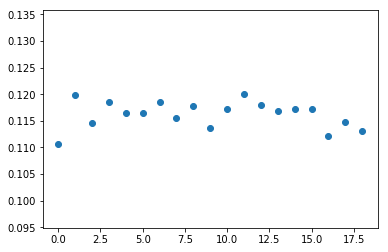

In [156]:
plt.scatter(range(19),train_top.history['mean_squared_logarithmic_error']);

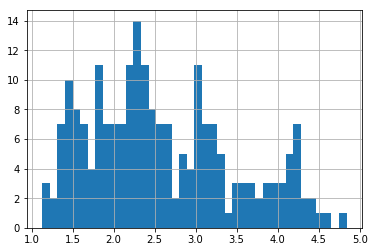

In [127]:
df_inc.SAD.hist(bins=40);

In [128]:
df_inc.SAD.describe()

count    212.000000
mean       2.589151
std        0.883783
min        1.130000
25%        1.900000
50%        2.405000
75%        3.160000
max        4.840000
Name: SAD, dtype: float64

In [163]:
newpath = r'./{}'.format('SAD') 
newpath

'./SAD'

In [160]:
newpath = r'C:\Program Files\arbitrary' 
newpath

'C:\\Program Files\\arbitrary'

In [176]:
def create_direct(cl):
    newpath = r'./{}'.format(cl)
    if not os.path.exists(newpath):
        os.makedirs(newpath)
        os.makedirs(newpath+'/train')
        os.makedirs(newpath+'/train/pos')
        os.makedirs(newpath+'/train/neg')
        os.makedirs(newpath+'/valid')
        os.makedirs(newpath+'/valid/pos')
        os.makedirs(newpath+'/valid/neg')

def cl_setup_folds(cl):
    os.mkdir('/'+str(cl)+'/train')
    os.mkdir('/'+str(cl)+'/train/pos')
    os.mkdir('/'+str(cl)+'/train/neg')
    os.mkdir('/'+str(cl)+'/valid')
    os.mkdir('/'+str(cl)+'/valid/pos')
    os.mkdir('/'+str(cl)+'/valid/neg')
    
folds = []
for fold_idx, split in enumerate(folder.split(X=df_inc.index.values)):
    folds.append(split)

def cl_run_k_fold(k, cl, threshold):
    fold = folds[k]
    path = r'./{}'.format(cl)
    train_df = df_inc.loc[fold[0]]
    train_pos = train_df.loc[train_df['{}'.format(cl)].map(lambda x : True if x > threshold else False)]
    train_neg = train_df.loc[train_df['{}'.format(cl)].map(lambda x : True if x <= threshold else False)]
    valid_df = df_inc.loc[fold[1]]
    valid_pos = valid_df.loc[valid_df['{}'.format(cl)].map(lambda x : True if x > threshold else False)]
    valid_neg = valid_df.loc[valid_df['{}'.format(cl)].map(lambda x : True if x <= threshold else False)]
    for member in train_pos['jpeg_names'].values:
        os.link(member, os.path.join(os.path.abspath(path+'/train/pos'), member))
    for member in train_neg['jpeg_names'].values:
        os.link(member, os.path.join(os.path.abspath(path+'/train/neg'), member))
    for member in valid_pos['jpeg_names'].values:
        os.link(member, os.path.join(os.path.abspath(path+'/valid/pos'), member))
    for member in valid_neg['jpeg_names'].values:
        os.link(member, os.path.join(os.path.abspath(path+'/valid/neg'), member))
        
def cl_clean_up_folds(cl):
    path = r'./{}'.format(cl)
    def clean_up(folder):
        for the_file in os.listdir(folder):
            file_path = os.path.join(folder, the_file)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path): shutil.rmtree(file_path)
            except Exception as e:
                print(e)
    clean_up(newpath+'/train')
    os.rmdir(newpath+'/train')
    clean_up(newpath+'/valid')
    os.rmdir(newpath+'/valid')

In [183]:
create_direct('SAD')
create_direct('SUR')
create_direct('ANG')
create_direct('DIS')
create_direct('FEA')

In [184]:
folds = []
for fold_idx, split in enumerate(folder.split(X=df_inc.index.values)):
    folds.append(split)

In [185]:
cl_run_k_fold(0, 'SAD', 2.589151)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [186]:
train_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, preprocessing_function=tf.keras.applications.xception.preprocess_input)
train_iter = train_feed.flow_from_directory(
    './SAD/train/', target_size=(299, 299), follow_links=True, class_mode='binary')
valid_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0, width_shift_range=0,
    height_shift_range=0, preprocessing_function=tf.keras.applications.xception.preprocess_input)
valid_iter = valid_feed.flow_from_directory(
    './SAD/valid/', target_size=(299, 299), follow_links=True, class_mode='binary')

Found 135 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [190]:
xcpt_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(299, 299, 3), 
                                              classes=1)

In [191]:
x = xcpt_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(682, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.3)(x)
predictions = tf.keras.layers.Dense(1, 'sigmoid', bias_initializer='Zeros', 
                          kernel_initializer=tf.keras.initializers.glorot_uniform(),
                          trainable=True, use_bias=True, name='predictions')(x)
CNN = tf.keras.models.Model(inputs=xcpt_model.inputs, outputs=predictions)

In [192]:
for layer in CNN.layers[:len(xcpt_model.layers)]:
    layer.trainable = False

In [193]:
CNN.compile(loss = tf.keras.losses.binary_crossentropy, 
                    optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=["acc", tf.keras.metrics.mean_squared_logarithmic_error])

In [194]:
top_weights_path = '/home/ubuntu/JapaneseFaces/jaffe/jpg/vision_top_model_weights.h5'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(top_weights_path, monitor='acc',
                                       verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10, verbose=1)
]

In [195]:
train_top = CNN.fit_generator(train_iter, validation_data=valid_iter,
                        callbacks=callbacks_list, steps_per_epoch=train_iter.samples//train_iter.batch_size,
                        validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=15)

Epoch 1/15
4/4 [==============================] - 20s - loss: 0.6973 - acc: 0.5391 - mean_squared_logarithmic_error: 0.1318 - val_loss: 0.6942 - val_acc: 0.5896 - val_mean_squared_logarithmic_error: 0.1261
Epoch 2/15
4/4 [==============================] - 7s - loss: 0.6997 - acc: 0.4602 - mean_squared_logarithmic_error: 0.1385 - val_loss: 0.6926 - val_acc: 0.5970 - val_mean_squared_logarithmic_error: 0.1260
Epoch 3/15
4/4 [==============================] - 7s - loss: 0.7246 - acc: 0.4274 - mean_squared_logarithmic_error: 0.1333 - val_loss: 0.6919 - val_acc: 0.5896 - val_mean_squared_logarithmic_error: 0.1250
Epoch 4/15
4/4 [==============================] - 7s - loss: 0.6879 - acc: 0.5376 - mean_squared_logarithmic_error: 0.1315 - val_loss: 0.6901 - val_acc: 0.5896 - val_mean_squared_logarithmic_error: 0.1250
Epoch 5/15
4/4 [==============================] - 7s - loss: 0.6975 - acc: 0.5011 - mean_squared_logarithmic_error: 0.1319 - val_loss: 0.6960 - val_acc: 0.5746 - val_mean_squared_

In [198]:
df_inc.ANG.describe()

count    212.000000
mean       2.465896
std        0.969596
min        1.030000
25%        1.770000
50%        2.190000
75%        3.070000
max        4.770000
Name: ANG, dtype: float64

In [199]:
cl_run_k_fold(0, 'ANG', 2.465896)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [200]:
train_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, preprocessing_function=tf.keras.applications.xception.preprocess_input)
train_iter = train_feed.flow_from_directory(
    './ANG/train/', target_size=(299, 299), follow_links=True, class_mode='binary')
valid_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0, width_shift_range=0,
    height_shift_range=0, preprocessing_function=tf.keras.applications.xception.preprocess_input)
valid_iter = valid_feed.flow_from_directory(
    './ANG/valid/', target_size=(299, 299), follow_links=True, class_mode='binary')

Found 135 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [201]:
xcpt_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(299, 299, 3), 
                                              classes=1)

In [202]:
x = xcpt_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(682, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.3)(x)
predictions = tf.keras.layers.Dense(1, 'sigmoid', bias_initializer='Zeros', 
                          kernel_initializer=tf.keras.initializers.glorot_uniform(),
                          trainable=True, use_bias=True, name='predictions')(x)
CNN = tf.keras.models.Model(inputs=xcpt_model.inputs, outputs=predictions)

In [203]:
for layer in CNN.layers[:len(xcpt_model.layers)]:
    layer.trainable = False

In [204]:
CNN.compile(loss = tf.keras.losses.binary_crossentropy, 
                    optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=["acc", tf.keras.metrics.mean_squared_logarithmic_error])

In [205]:
top_weights_path = '/home/ubuntu/JapaneseFaces/jaffe/jpg/vision_top_model_weights.h5'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(top_weights_path, monitor='acc',
                                       verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10, verbose=1)
]

In [206]:
train_top = CNN.fit_generator(train_iter, validation_data=valid_iter,
                        callbacks=callbacks_list, steps_per_epoch=train_iter.samples//train_iter.batch_size,
                        validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=15)

Epoch 1/15
4/4 [==============================] - 20s - loss: 0.6653 - acc: 0.5703 - mean_squared_logarithmic_error: 0.1211 - val_loss: 0.6534 - val_acc: 0.6119 - val_mean_squared_logarithmic_error: 0.1164
Epoch 2/15
4/4 [==============================] - 6s - loss: 0.6790 - acc: 0.5808 - mean_squared_logarithmic_error: 0.1253 - val_loss: 0.6434 - val_acc: 0.6343 - val_mean_squared_logarithmic_error: 0.1156
Epoch 3/15
4/4 [==============================] - 6s - loss: 0.6571 - acc: 0.6031 - mean_squared_logarithmic_error: 0.1199 - val_loss: 0.6436 - val_acc: 0.6269 - val_mean_squared_logarithmic_error: 0.1146
Epoch 4/15
4/4 [==============================] - 7s - loss: 0.6647 - acc: 0.5890 - mean_squared_logarithmic_error: 0.1222 - val_loss: 0.6410 - val_acc: 0.6343 - val_mean_squared_logarithmic_error: 0.1142
Epoch 5/15
4/4 [==============================] - 7s - loss: 0.6367 - acc: 0.6605 - mean_squared_logarithmic_error: 0.1111 - val_loss: 0.6326 - val_acc: 0.6493 - val_mean_squared_

In [207]:
df_inc.SUR.describe()

count    212.000000
mean       2.450755
std        1.175079
min        1.100000
25%        1.610000
50%        1.840000
75%        3.297500
max        4.970000
Name: SUR, dtype: float64

In [208]:
df_inc.SUR.describe()[1]

2.4507547169811317

In [210]:
cl_run_k_fold(0, 'SUR', df_inc.SUR.describe()[1])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [211]:
train_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, preprocessing_function=tf.keras.applications.xception.preprocess_input)
train_iter = train_feed.flow_from_directory(
    './SUR/train/', target_size=(299, 299), follow_links=True, class_mode='binary')
valid_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0, width_shift_range=0,
    height_shift_range=0, preprocessing_function=tf.keras.applications.xception.preprocess_input)
valid_iter = valid_feed.flow_from_directory(
    './SUR/valid/', target_size=(299, 299), follow_links=True, class_mode='binary')

xcpt_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(299, 299, 3), 
                                              classes=1)

x = xcpt_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(682, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.3)(x)
predictions = tf.keras.layers.Dense(1, 'sigmoid', bias_initializer='Zeros', 
                          kernel_initializer=tf.keras.initializers.glorot_uniform(),
                          trainable=True, use_bias=True, name='predictions')(x)
CNN = tf.keras.models.Model(inputs=xcpt_model.inputs, outputs=predictions)

for layer in CNN.layers[:len(xcpt_model.layers)]:
    layer.trainable = False
    
CNN.compile(loss = tf.keras.losses.binary_crossentropy, 
                    optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=["acc", tf.keras.metrics.mean_squared_logarithmic_error])

top_weights_path = '/home/ubuntu/JapaneseFaces/jaffe/jpg/vision_top_model_weights.h5'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(top_weights_path, monitor='acc',
                                       verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10, verbose=1)
]

train_top = CNN.fit_generator(train_iter, validation_data=valid_iter,
                        callbacks=callbacks_list, steps_per_epoch=train_iter.samples//train_iter.batch_size,
                        validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=15)

Found 135 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
Epoch 1/15
4/4 [==============================] - 20s - loss: 0.7147 - acc: 0.4453 - mean_squared_logarithmic_error: 0.1481 - val_loss: 0.6614 - val_acc: 0.6791 - val_mean_squared_logarithmic_error: 0.1277
Epoch 2/15
4/4 [==============================] - 5s - loss: 0.7014 - acc: 0.4989 - mean_squared_logarithmic_error: 0.1402 - val_loss: 0.6597 - val_acc: 0.6940 - val_mean_squared_logarithmic_error: 0.1272
Epoch 3/15
4/4 [==============================] - 4s - loss: 0.7128 - acc: 0.4661 - mean_squared_logarithmic_error: 0.1432 - val_loss: 0.6563 - val_acc: 0.7015 - val_mean_squared_logarithmic_error: 0.1267
Epoch 4/15
4/4 [==============================] - 5s - loss: 0.6935 - acc: 0.5622 - mean_squared_logarithmic_error: 0.1324 - val_loss: 0.6510 - val_acc: 0.7164 - val_mean_squared_logarithmic_error: 0.1263
Epoch 5/15
4/4 [==============================] - 5s - loss: 0.6885 - acc: 0.5726 - mean_squared_l

In [212]:
cl_run_k_fold(0, 'DIS', df_inc.DIS.describe()[1])
cl_run_k_fold(0, 'FEA', df_inc.FEA.describe()[1])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [213]:
train_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, preprocessing_function=tf.keras.applications.xception.preprocess_input)
train_iter = train_feed.flow_from_directory(
    './DIS/train/', target_size=(299, 299), follow_links=True, class_mode='binary')
valid_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0, width_shift_range=0,
    height_shift_range=0, preprocessing_function=tf.keras.applications.xception.preprocess_input)
valid_iter = valid_feed.flow_from_directory(
    './DIS/valid/', target_size=(299, 299), follow_links=True, class_mode='binary')

xcpt_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(299, 299, 3), 
                                              classes=1)

x = xcpt_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(682, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.3)(x)
predictions = tf.keras.layers.Dense(1, 'sigmoid', bias_initializer='Zeros', 
                          kernel_initializer=tf.keras.initializers.glorot_uniform(),
                          trainable=True, use_bias=True, name='predictions')(x)
CNN = tf.keras.models.Model(inputs=xcpt_model.inputs, outputs=predictions)

for layer in CNN.layers[:len(xcpt_model.layers)]:
    layer.trainable = False
    
CNN.compile(loss = tf.keras.losses.binary_crossentropy, 
                    optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=["acc", tf.keras.metrics.mean_squared_logarithmic_error])

top_weights_path = '/home/ubuntu/JapaneseFaces/jaffe/jpg/vision_top_model_weights.h5'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(top_weights_path, monitor='acc',
                                       verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10, verbose=1)
]

train_top = CNN.fit_generator(train_iter, validation_data=valid_iter,
                        callbacks=callbacks_list, steps_per_epoch=train_iter.samples//train_iter.batch_size,
                        validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=15)

Found 135 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
Epoch 1/15
4/4 [==============================] - 25s - loss: 0.7043 - acc: 0.4766 - mean_squared_logarithmic_error: 0.1302 - val_loss: 0.6874 - val_acc: 0.5746 - val_mean_squared_logarithmic_error: 0.1286
Epoch 2/15
4/4 [==============================] - 6s - loss: 0.7054 - acc: 0.4907 - mean_squared_logarithmic_error: 0.1254 - val_loss: 0.6876 - val_acc: 0.5970 - val_mean_squared_logarithmic_error: 0.1271
Epoch 3/15
4/4 [==============================] - 7s - loss: 0.6889 - acc: 0.5376 - mean_squared_logarithmic_error: 0.1266 - val_loss: 0.6854 - val_acc: 0.5821 - val_mean_squared_logarithmic_error: 0.1257
Epoch 4/15
4/4 [==============================] - 6s - loss: 0.6852 - acc: 0.5622 - mean_squared_logarithmic_error: 0.1201 - val_loss: 0.6852 - val_acc: 0.5522 - val_mean_squared_logarithmic_error: 0.1265
Epoch 5/15
4/4 [==============================] - 6s - loss: 0.6873 - acc: 0.5726 - mean_squared_l

In [214]:
train_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, preprocessing_function=tf.keras.applications.xception.preprocess_input)
train_iter = train_feed.flow_from_directory(
    './FEA/train/', target_size=(299, 299), follow_links=True, class_mode='binary')
valid_feed = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0, width_shift_range=0,
    height_shift_range=0, preprocessing_function=tf.keras.applications.xception.preprocess_input)
valid_iter = valid_feed.flow_from_directory(
    './FEA/valid/', target_size=(299, 299), follow_links=True, class_mode='binary')

xcpt_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(299, 299, 3), 
                                              classes=1)

x = xcpt_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(682, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.3)(x)
predictions = tf.keras.layers.Dense(1, 'sigmoid', bias_initializer='Zeros', 
                          kernel_initializer=tf.keras.initializers.glorot_uniform(),
                          trainable=True, use_bias=True, name='predictions')(x)
CNN = tf.keras.models.Model(inputs=xcpt_model.inputs, outputs=predictions)

for layer in CNN.layers[:len(xcpt_model.layers)]:
    layer.trainable = False
    
CNN.compile(loss = tf.keras.losses.binary_crossentropy, 
                    optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9),
                    metrics=["acc", tf.keras.metrics.mean_squared_logarithmic_error])

top_weights_path = '/home/ubuntu/JapaneseFaces/jaffe/jpg/vision_top_model_weights.h5'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(top_weights_path, monitor='acc',
                                       verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='acc', patience=10, verbose=1)
]

train_top = CNN.fit_generator(train_iter, validation_data=valid_iter,
                        callbacks=callbacks_list, steps_per_epoch=train_iter.samples//train_iter.batch_size,
                        validation_steps=5, shuffle=True, use_multiprocessing=True, workers=1, epochs=15)

Found 135 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
Epoch 1/15
4/4 [==============================] - 24s - loss: 0.7908 - acc: 0.4297 - mean_squared_logarithmic_error: 0.1597 - val_loss: 0.8023 - val_acc: 0.4030 - val_mean_squared_logarithmic_error: 0.1646
Epoch 2/15
4/4 [==============================] - 6s - loss: 0.7699 - acc: 0.4884 - mean_squared_logarithmic_error: 0.1501 - val_loss: 0.7984 - val_acc: 0.4030 - val_mean_squared_logarithmic_error: 0.1637
Epoch 3/15
4/4 [==============================] - 5s - loss: 0.7764 - acc: 0.4356 - mean_squared_logarithmic_error: 0.1558 - val_loss: 0.8026 - val_acc: 0.3955 - val_mean_squared_logarithmic_error: 0.1651
Epoch 4/15
4/4 [==============================] - 6s - loss: 0.7522 - acc: 0.4743 - mean_squared_logarithmic_error: 0.1468 - val_loss: 0.8017 - val_acc: 0.3881 - val_mean_squared_logarithmic_error: 0.1654
Epoch 5/15
4/4 [==============================] - 5s - loss: 0.7250 - acc: 0.4966 - mean_squared_l

In [226]:
GoogleAnalysis = pd.read_csv('../../GoogleAnalysis.csv', sep=',')
GoogleAnalysis.head()

,Unnamed: 0,ANG,Conf,HAP,PIC,SAD,SUR
0,0,1.0,0.901068,1.0,NM-FE3.jpeg,3.0,1.0
1,1,1.0,0.968047,1.0,YM-NE1.jpeg,2.0,1.0
2,2,1.0,0.952909,1.0,YM-NE2.jpeg,2.0,1.0
3,3,1.0,0.972460,1.0,KL-FE2.jpeg,4.0,1.0
4,4,1.0,0.968292,1.0,NM-AN3.jpeg,3.0,1.0


In [227]:
len(GoogleAnalysis)

213

In [218]:
df_inc.head()

,#,HAP,SAD,SUR,ANG,DIS,FEA,PIC,jpeg_names
0,1,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,KM-NE1.jpeg
1,2,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,KM-NE2.jpeg
2,3,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,KM-NE3.jpeg
3,4,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,KM-HA1.jpeg
4,5,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,KM-HA2.jpeg


In [228]:
len(df_inc)

212

In [229]:
def df_clean_up(df, directory):
    lst = df['PIC']
    for row, name in enumerate(lst):
        if name not in os.listdir(directory):
            print(name)
            df.drop(row, inplace=True)

In [230]:
pwd

'/home/ubuntu/JapaneseFaces/jaffe/jpg'

In [233]:
df_clean_up(GoogleAnalysis, '/home/ubuntu/JapaneseFaces/jaffe/jpg')
GoogleAnalysis.head()

,Unnamed: 0,ANG,Conf,HAP,PIC,SAD,SUR
0,0,1.0,0.901068,1.0,NM-FE3.jpeg,3.0,1.0
1,1,1.0,0.968047,1.0,YM-NE1.jpeg,2.0,1.0
2,2,1.0,0.952909,1.0,YM-NE2.jpeg,2.0,1.0
3,3,1.0,0.972460,1.0,KL-FE2.jpeg,4.0,1.0
4,4,1.0,0.968292,1.0,NM-AN3.jpeg,3.0,1.0


In [234]:
len(GoogleAnalysis)

213

In [235]:
create_direct('Google/HAP')
create_direct('Google/SAD')
create_direct('Google/SUR')
create_direct('Google/ANG')
create_direct('Google/DIS')
create_direct('Google/FEA')

In [236]:
folds = []
for fold_idx, split in enumerate(folder.split(X=df_inc.index.values)):
    folds.append(split)

In [240]:
GoogleAnalysis.describe()

,Unnamed: 0,ANG,Conf,HAP,SAD,SUR
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,106.000000,1.018779,0.957889,1.460094,2.985915,1.300469
std,61.631972,0.136065,0.036751,1.222646,1.606235,0.973154
min,0.000000,1.000000,0.758655,1.000000,1.000000,1.000000
25%,53.000000,1.000000,0.951040,1.000000,1.000000,1.000000
50%,106.000000,1.000000,0.968932,1.000000,3.000000,1.000000
75%,159.000000,1.000000,0.979585,1.000000,5.000000,1.000000
max,212.000000,2.000000,0.996873,5.000000,5.000000,5.000000


In [246]:
GoogleAnalysis.describe().HAP[1]

1.460093896713615

In [247]:
cl_run_k_fold(0, 'Google/HAP', GoogleAnalysis.describe().HAP[1])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


KeyError: 'Google/HAP'

## CV notes and Fine Tunning
So... talked to Matt. We cross validate our entire model, to prove that it is learning. But, and I knew this somewhere in my head, with out a massive data set, you should not train the bottom. Plus, and the more I think about this, the clearer it becomes, we do not have the memory to train a whole network. Moral of the story is, for this toy set, we should not train the whole network. But for the huge PITA dataset, we could think about it. 

In [ ]:
tf.keras.preprocessing.image.load_img('../Affect')